# **Android Devices EDA Project**

## 1. Introduction
- Dataset source: Kaggle - "mobiles1"
- Objective: Explore mobile specs and price relationships
- Tools: Pandas, NumPy, Matplotlib, Seaborn, Regex

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreyaspj/android-devices-and-mobiles")

print("Path to dataset files:", path)

100%|██████████| 30.5k/30.5k [00:00<00:00, 11.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shreyaspj/android-devices-and-mobiles/versions/1


## 2. Data Loading & Initial Exploration
- Read CSV
- df.info(), df.describe(), df.head()
- Column types and null values

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
folder_path = '/root/.cache/kagglehub/datasets/shreyaspj/android-devices-and-mobiles/versions/1'
print(os.listdir(folder_path))

['mobiles1.csv']


In [5]:
csv_path = os.path.join(folder_path, 'mobiles1.csv')
df = pd.read_csv(csv_path)
df.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [6]:
df.shape

(984, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    984 non-null    object 
 1   camera     984 non-null    object 
 2   display    984 non-null    object 
 3   memory     984 non-null    object 
 4   name       984 non-null    object 
 5   price      984 non-null    int64  
 6   processor  983 non-null    object 
 7   rating     971 non-null    float64
 8   reviews    971 non-null    object 
 9   warranty   836 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 77.0+ KB


In [8]:
df.isnull().sum()

,0
battery,0
camera,0
display,0
memory,0
name,0
price,0
processor,1
rating,13
reviews,13
warranty,148


## 3. Data Cleaning
- Handling missing values
- Extracting:
  - battery_mAh from 'battery'
  - ram_gb, rom_gb from 'memory'
  - front_camera_MP, rear_camera_total_mp, rear_lens_count from 'camera'
  - screen_size_inch from 'display'
  - reviews_count from 'reviews'
- Type conversions

In [9]:
df_cleaned = df

In [10]:
df_cleaned['processor'].fillna(df_cleaned['processor'].mode()[0], inplace=True)

/tmp/ipython-input-10-1364575325.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['processor'].fillna(df_cleaned['processor'].mode()[0], inplace=True)


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    984 non-null    object 
 1   camera     984 non-null    object 
 2   display    984 non-null    object 
 3   memory     984 non-null    object 
 4   name       984 non-null    object 
 5   price      984 non-null    int64  
 6   processor  984 non-null    object 
 7   rating     971 non-null    float64
 8   reviews    971 non-null    object 
 9   warranty   836 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 77.0+ KB


In [12]:
df_cleaned.drop(columns=['warranty'], inplace=True)

In [13]:
df_cleaned.dropna(inplace=True)

In [14]:
df_cleaned.head(5)

,battery,camera,display,memory,name,price,processor,rating,reviews
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews"
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews"
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews"
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews"
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews"


In [15]:
df_cleaned['battery_mAh'] = df_cleaned['battery'].str.extract(r'(\d{3,5})').astype(float)

In [16]:
df_cleaned[['ram_gb', 'rom_gb']] = df_cleaned['memory'].str.extract(r'(\d+)\s*GB RAM\s*\|\s*(\d+)\s*GB ROM').astype(float)

In [17]:
df_cleaned['screen_size_inch'] = df_cleaned['display'].str.extract(r'\((\d.+)\s*inch\)').astype(float)

In [18]:
df_cleaned['rear_cameras'] = df_cleaned['camera'].str.split(r'\|').str[0]

In [19]:
df_cleaned['front_camera_MP'] = df_cleaned['camera'].str.extract(r'(\d+)\s*MP\s*Front').astype(float)

In [20]:
df['rear_camera_list'] = df['rear_cameras'].str.findall(r'(\d+)\s*MP')

In [21]:
df['rear_camera_total_mp'] = df['rear_camera_list'].apply(lambda x: sum(map(int, x)))
df['rear_lens_count'] = df['rear_camera_list'].apply(lambda x: len(x))

In [22]:
df.drop(columns=['rear_cameras', 'rear_camera_list'], inplace=True)

In [23]:
df_cleaned.tail()

,battery,camera,display,memory,name,price,processor,rating,reviews,battery_mAh,ram_gb,rom_gb,screen_size_inch,front_camera_MP,rear_camera_total_mp,rear_lens_count
979,2000 mAh Battery,5MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) FWVGA Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 MB,"Micromax Bharat 4 (Black, 8 GB)",3590,12 Months Brand Warranty,3.8,105 Reviews,2000.0,1.0,8.0,5.0,2.0,5,1
980,2680 mAh Li-Ion Battery,13MP Rear Camera | 5MP Front Camera,13.21 cm (5.2 inch) Full HD Display,3 GB RAM | 32 GB ROM,"Nextbit Robin (Ember, 32 GB)",19999,Qualcomm Snapdragon 808 MSM8992 Processor,4.0,516 Reviews,2680.0,3.0,32.0,5.2,5.0,13,1
981,4550 mAh Battery,13MP + 5MP | 20MP Front Camera,15.24 cm (6 inch) Full HD Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,Helio P25 MT 6757CD Processor,4.1,710 Reviews,4550.0,4.0,64.0,6.0,20.0,18,2
982,2100 mAh Li-Ion Battery,8MP Rear Camera | 2MP Front Camera,12.7 cm (5 inch) HD Display,1 GB RAM | 8 GB ROM | Expandable Upto 32 GB,"XOLO Omega 5.0 (Black, 8 GB)",8990,MTK 6592M Processor,3.8,81 Reviews,2100.0,1.0,8.0,5.0,2.0,8,1
983,3000 mAh Battery,12MP Rear Camera | 8MP Front Camera,14.73 cm (5.8 inch) Quad HD+ Display,4 GB RAM | 256 GB ROM | Expandable Upto 400 GB,"Samsung Galaxy S9 (Midnight Black, 256 GB)",65900,Exynos 9810 Processor,4.4,"2,331 Reviews",3000.0,4.0,256.0,5.8,8.0,12,1


In [24]:
df_cleaned['reviews_count'] = df_cleaned['reviews'].str.replace(',', '').str.extract(r'(\d+)\s*Reviews').astype(float)

In [25]:
df_cleaned.rename(columns={'processor': 'proc'}, inplace=True)

In [26]:
df_cleaned['processor'] = df_cleaned['proc'].str.replace(r'\s*Processor.*', '', regex=True).str.strip()

In [27]:
df_cleaned.drop(columns=['battery', 'camera', 'display', 'memory', 'reviews', 'proc'], inplace=True)

In [28]:
df_cleaned.describe()

,price,rating,battery_mAh,ram_gb,rom_gb,screen_size_inch,front_camera_MP,rear_camera_total_mp,rear_lens_count,reviews_count
count,971.000000,971.000000,971.000000,954.000000,954.000000,968.000000,823.000000,971.000000,971.000000,971.000000
mean,15050.303811,4.241195,3813.872297,4.285115,75.073375,6.015686,13.679222,31.186406,2.194645,6441.051493
std,11984.351276,0.300296,910.321763,2.238284,65.929188,0.613612,8.931839,26.018258,1.111427,14962.010067
min,887.000000,2.700000,1200.000000,1.000000,4.000000,2.400000,1.000000,2.000000,1.000000,0.000000
25%,7499.000000,4.100000,3065.000000,3.000000,32.000000,5.600000,5.000000,13.000000,1.000000,107.000000
50%,11499.000000,4.300000,4000.000000,4.000000,64.000000,6.220000,13.000000,17.000000,2.000000,648.000000
75%,17999.000000,4.400000,4300.000000,6.000000,128.000000,6.440000,16.000000,56.000000,3.000000,4405.000000
max,97999.000000,4.900000,6000.000000,12.000000,512.000000,7.000000,40.000000,168.000000,4.000000,153238.000000


In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971 entries, 0 to 983
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  971 non-null    object 
 1   price                 971 non-null    int64  
 2   rating                971 non-null    float64
 3   battery_mAh           971 non-null    float64
 4   ram_gb                954 non-null    float64
 5   rom_gb                954 non-null    float64
 6   screen_size_inch      968 non-null    float64
 7   front_camera_MP       823 non-null    float64
 8   rear_camera_total_mp  971 non-null    int64  
 9   rear_lens_count       971 non-null    int64  
 10  reviews_count         971 non-null    float64
 11  processor             971 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 98.6+ KB


In [30]:
df_cleaned.isnull().sum()

,0
name,0
price,0
rating,0
battery_mAh,0
ram_gb,17
rom_gb,17
screen_size_inch,3
front_camera_MP,148
rear_camera_total_mp,0
rear_lens_count,0


In [31]:
df_cleaned.dropna(subset=['ram_gb', 'rom_gb'], inplace=True)

In [32]:
df_cleaned['screen_size_inch'].fillna(df_cleaned['screen_size_inch'].median(), inplace=True)

/tmp/ipython-input-32-4068994872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['screen_size_inch'].fillna(df_cleaned['screen_size_inch'].median(), inplace=True)


In [33]:
df_cleaned[df_cleaned['front_camera_MP'].isnull()]

,name,price,rating,battery_mAh,ram_gb,rom_gb,screen_size_inch,front_camera_MP,rear_camera_total_mp,rear_lens_count,reviews_count,processor
17,"POCO X2 (Phoenix Red, 128 GB)",18499,4.5,4500.0,6.0,128.0,6.67,NaN,76,4,17578.0,Qualcomm Snapdragon 730G
59,"Realme X3 (Arctic White, 128 GB)",24999,4.4,4200.0,6.0,128.0,6.57,NaN,86,4,101.0,Qualcomm Snapdragon 855+
69,"Redmi 8A Dual (Sky White, 32 GB)",8345,4.2,5000.0,2.0,32.0,6.22,NaN,15,2,310.0,Snapdragon 439 octa core processor
95,"POCO X2 (Matrix Purple, 128 GB)",18499,4.5,4500.0,6.0,128.0,6.67,NaN,76,4,17578.0,Qualcomm Snapdragon 730G
103,"Realme 6 Pro (Lightning Blue, 64 GB)",17999,4.4,4300.0,6.0,64.0,6.60,NaN,86,4,3991.0,Snapdragon 720G
...,...,...,...,...,...,...,...,...,...,...,...,...
943,"Zen Admire Blaze (Champagne Gold, 16 GB)",3199,3.8,2100.0,2.0,16.0,5.00,NaN,5,1,17.0,1 Year Manufacturer Warranty
944,"POCO X2 Special Edition (Matrix Purple, 128 GB)",18499,4.5,4500.0,6.0,128.0,6.67,NaN,76,4,736.0,Qualcomm Snapdragon 730G
958,"Karbonn K9 Kavach (Black, 16 GB)",3699,4.1,2300.0,2.0,16.0,5.00,NaN,5,1,234.0,1 Year Brand Warranty on Handset
964,"Redmi 6A (Gold, 32 GB)",5742,4.3,3000.0,2.0,32.0,5.45,NaN,13,1,3666.0,Mediateck


In [34]:
df_cleaned['front_camera_MP'].fillna(df_cleaned['front_camera_MP'].median(), inplace=True)

/tmp/ipython-input-34-3980756223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['front_camera_MP'].fillna(df_cleaned['front_camera_MP'].median(), inplace=True)


In [35]:
df_cleaned.describe()

,price,rating,battery_mAh,ram_gb,rom_gb,screen_size_inch,front_camera_MP,rear_camera_total_mp,rear_lens_count,reviews_count
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,15252.082809,4.253145,3849.339623,4.285115,75.073375,6.050675,13.692872,31.663522,2.215933,6552.667715
std,11990.426459,0.285677,871.454492,2.238284,65.929188,0.547069,8.224105,25.997679,1.109682,15071.240074
min,2499.000000,2.700000,1400.000000,1.000000,4.000000,4.000000,1.000000,2.000000,1.000000,0.000000
25%,7499.000000,4.100000,3100.000000,3.000000,32.000000,5.700000,8.000000,13.000000,1.000000,107.250000
50%,11975.000000,4.300000,4000.000000,4.000000,64.000000,6.220000,13.000000,17.000000,2.000000,710.000000
75%,17999.000000,4.400000,4300.000000,6.000000,128.000000,6.440000,16.000000,56.000000,3.000000,4727.000000
max,97999.000000,4.900000,6000.000000,12.000000,512.000000,7.000000,40.000000,168.000000,4.000000,153238.000000


In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 983
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  954 non-null    object 
 1   price                 954 non-null    int64  
 2   rating                954 non-null    float64
 3   battery_mAh           954 non-null    float64
 4   ram_gb                954 non-null    float64
 5   rom_gb                954 non-null    float64
 6   screen_size_inch      954 non-null    float64
 7   front_camera_MP       954 non-null    float64
 8   rear_camera_total_mp  954 non-null    int64  
 9   rear_lens_count       954 non-null    int64  
 10  reviews_count         954 non-null    float64
 11  processor             954 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 96.9+ KB


## 4. Univariate Analysis
- Histograms + Boxplots for all numerical features
- Bar charts for categorical features

In [37]:
df_cleaned.nunique()

,0
name,852
price,340
rating,22
battery_mAh,80
ram_gb,9
rom_gb,8
screen_size_inch,53
front_camera_MP,14
rear_camera_total_mp,57
rear_lens_count,4


In [38]:
df_cleaned.head()

,name,price,rating,battery_mAh,ram_gb,rom_gb,screen_size_inch,front_camera_MP,rear_camera_total_mp,rear_lens_count,reviews_count,processor
0,"Redmi 8 (Ruby Red, 64 GB)",9999,4.4,5000.0,4.0,64.0,6.22,8.0,14,2,55078.0,Qualcomm Snapdragon 439
1,"Realme 5i (Aqua Blue, 64 GB)",10999,4.5,5000.0,4.0,64.0,6.52,8.0,24,4,20062.0,Qualcomm Snapdragon 665 2 GHz
2,"Realme 5i (Aqua Blue, 128 GB)",11999,4.5,5000.0,4.0,128.0,6.52,8.0,24,4,20062.0,Qualcomm Snapdragon 665 (2 GHz)
3,"Realme 5i (Forest Green, 128 GB)",11999,4.5,5000.0,4.0,128.0,6.52,8.0,24,4,20062.0,Qualcomm Snapdragon 665 (2 GHz)
4,"Realme C2 (Diamond Blue, 32 GB)",7499,4.4,4000.0,3.0,32.0,6.10,5.0,15,2,10091.0,MediaTek P22 Octa Core 2.0 GHz


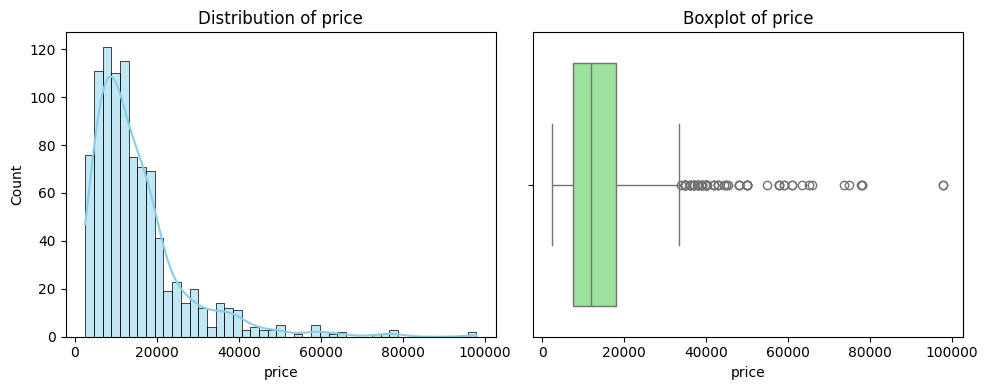

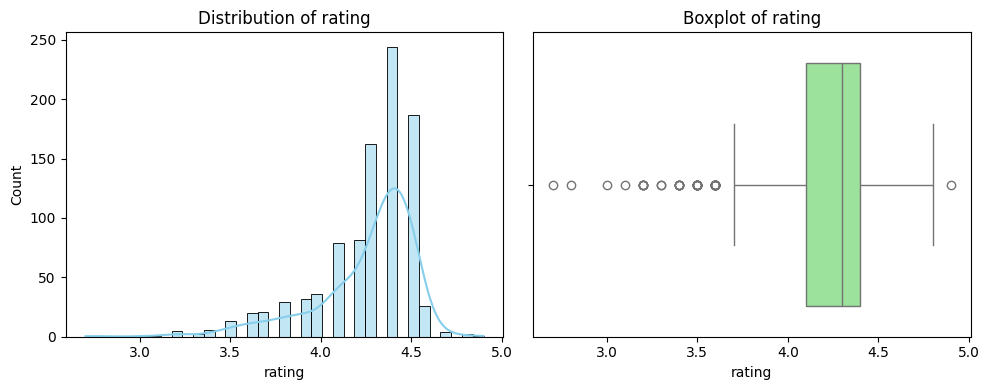

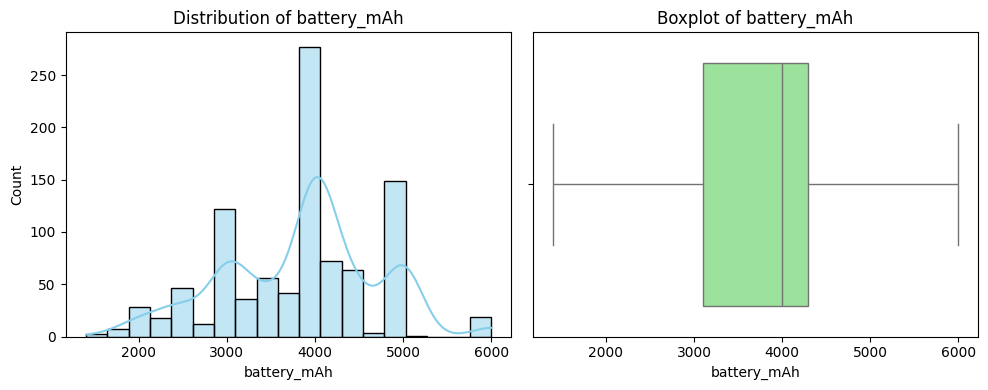

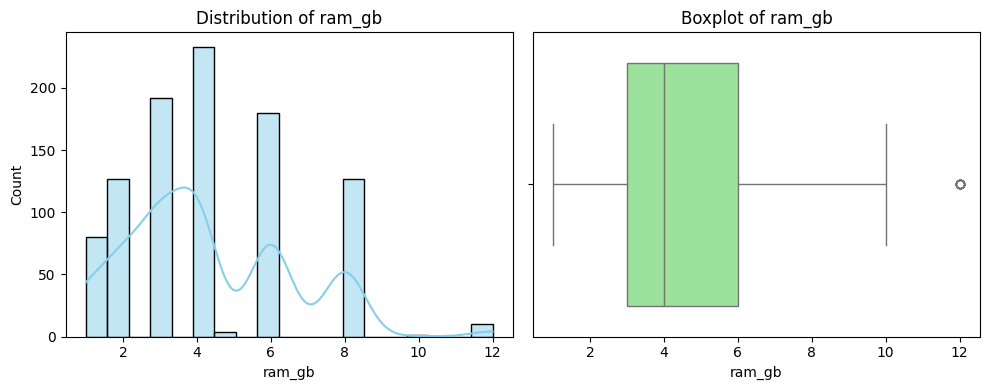

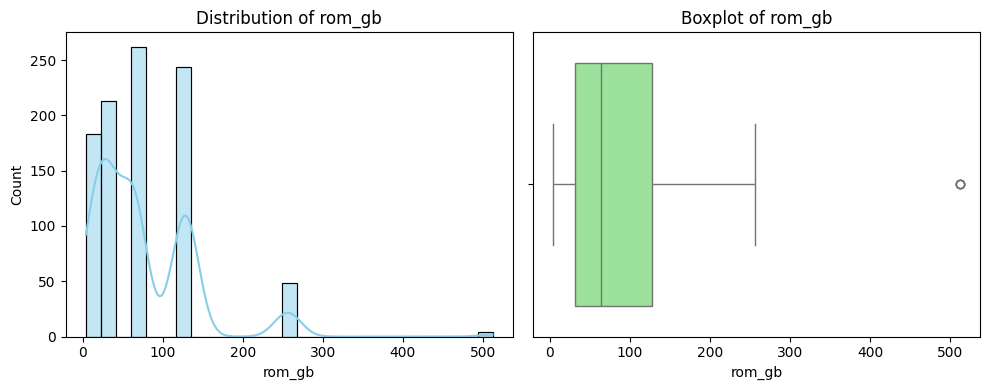

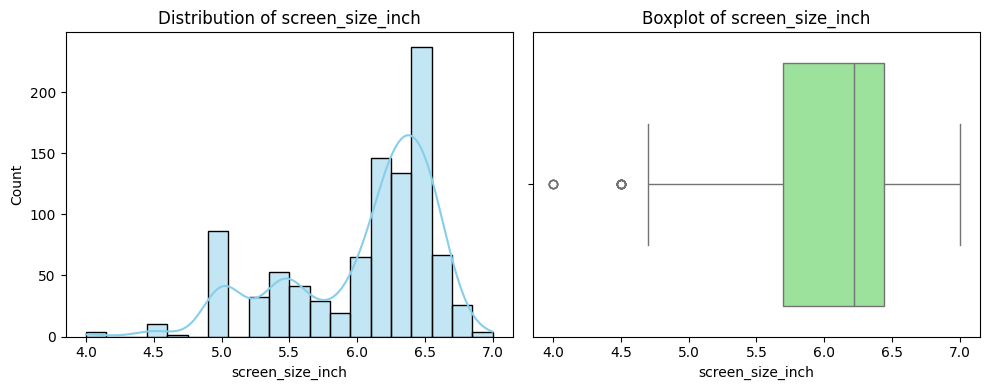

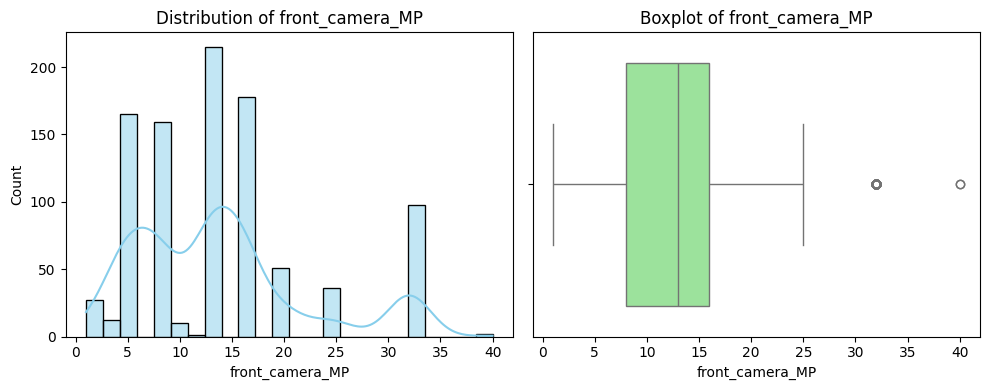

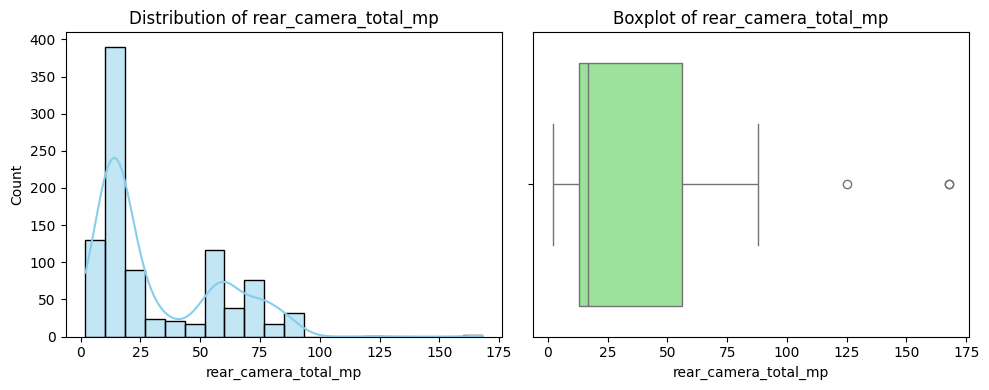

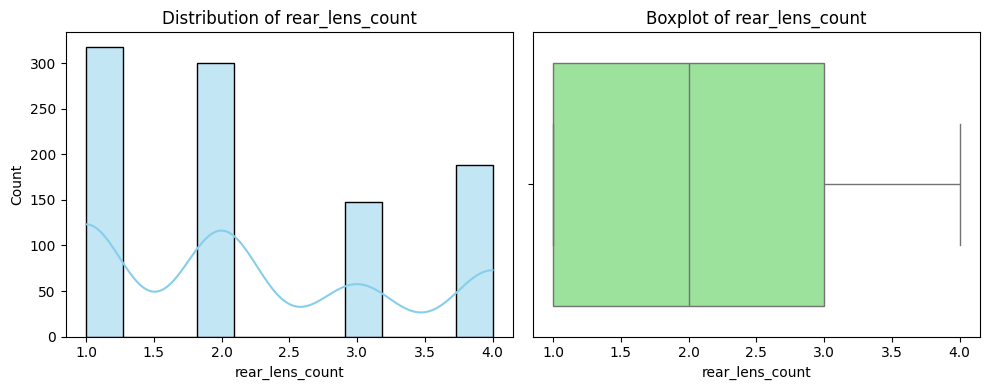

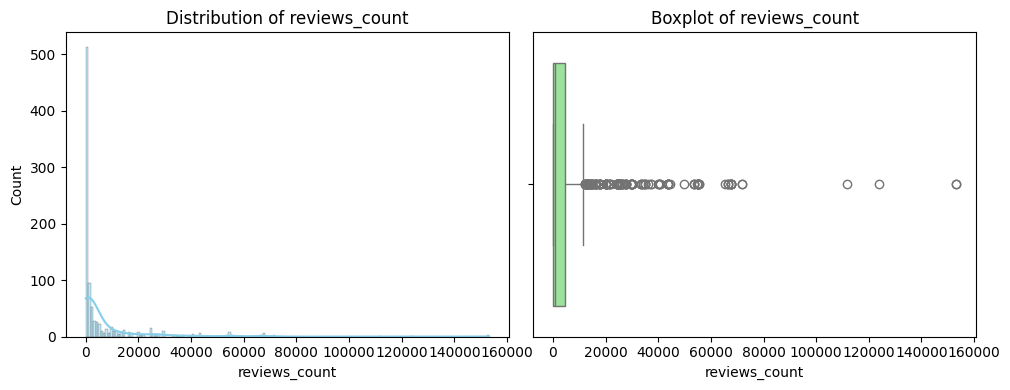

In [39]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Loop through numeric columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

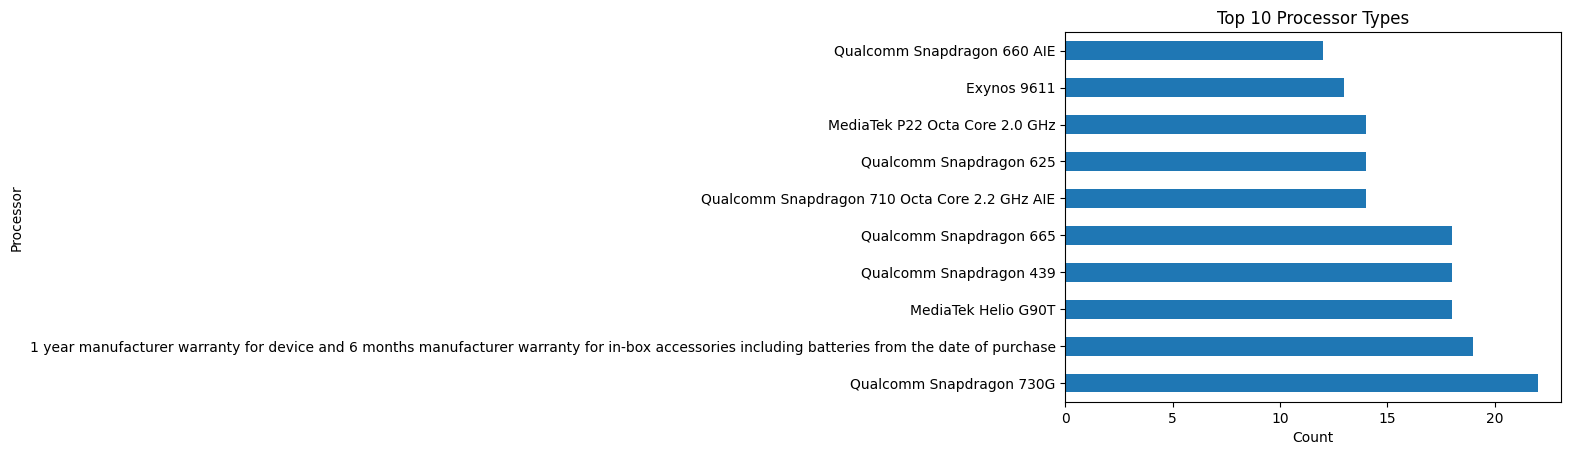

In [40]:
# Value counts for processor
df_cleaned['processor'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Processor Types")
plt.xlabel("Count")
plt.ylabel("Processor")
plt.show()

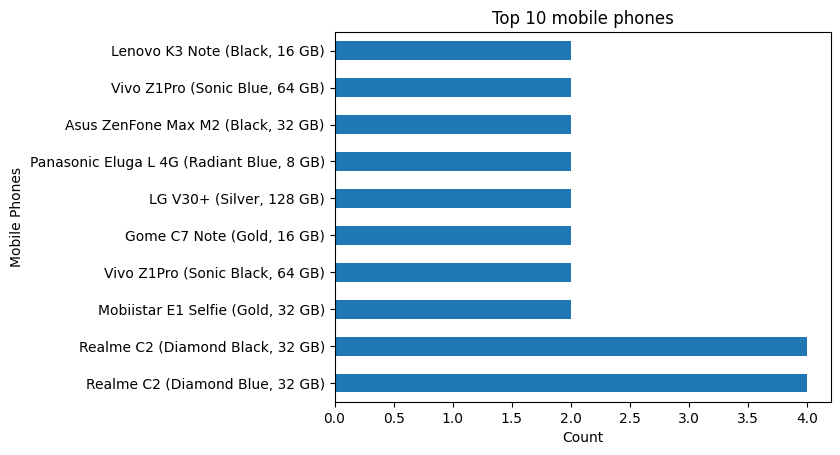

In [41]:
# Value counts for processor
df_cleaned['name'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 mobile phones")
plt.xlabel("Count")
plt.ylabel("Mobile Phones")
plt.show()

## 5. Bivariate Analysis
- Scatter plots: price vs RAM, battery, screen size
- Boxplots: processor vs price
- Correlation heatmap

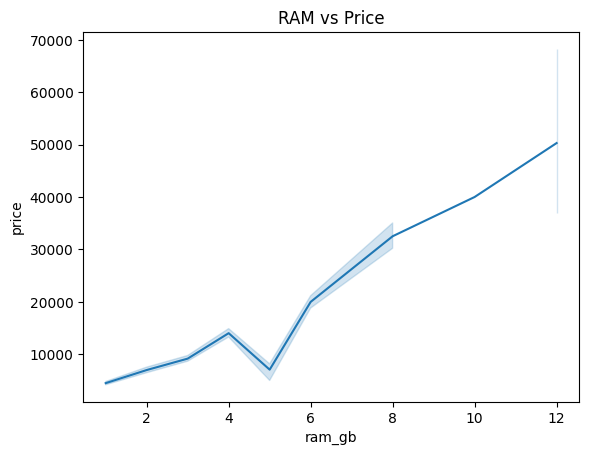

In [42]:
sns.lineplot(x='ram_gb', y='price', data=df_cleaned)
plt.title('RAM vs Price')
plt.show()

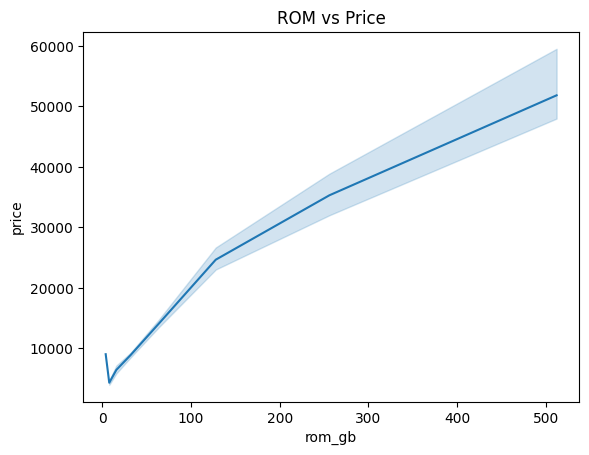

In [43]:
sns.lineplot(x='rom_gb', y='price', data=df_cleaned)
plt.title('ROM vs Price')
plt.show()

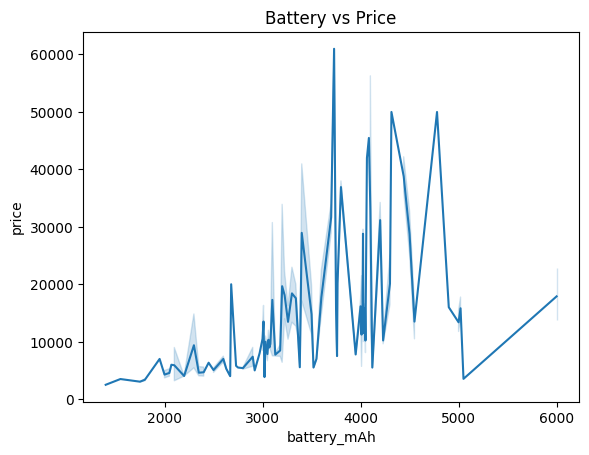

In [44]:
sns.lineplot(x='battery_mAh', y='price', data=df_cleaned)
plt.title('Battery vs Price')
plt.show()

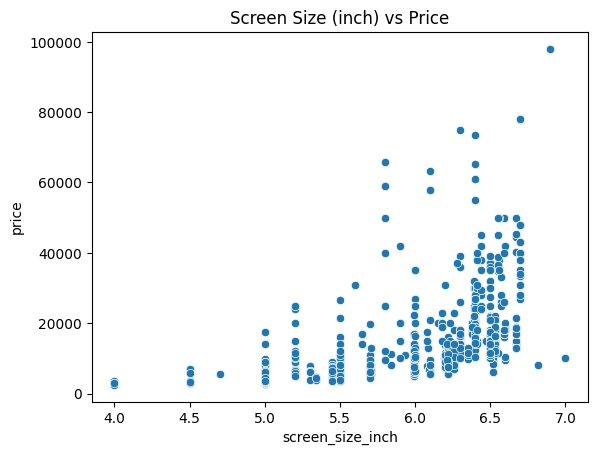

In [45]:
sns.scatterplot(x='screen_size_inch', y='price', data=df_cleaned)
plt.title('Screen Size (inch) vs Price')
plt.show()

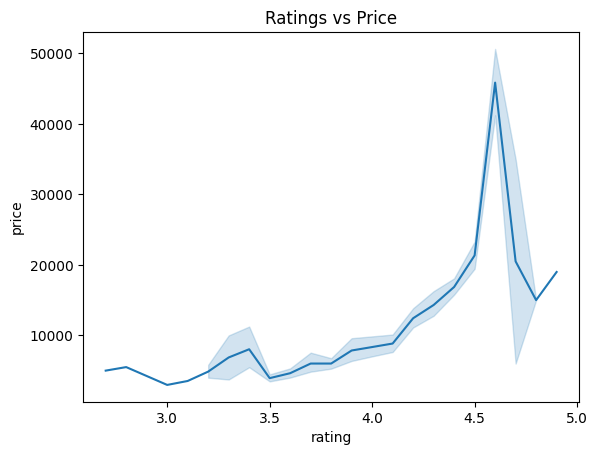

In [46]:
sns.lineplot(x='rating', y='price', data=df_cleaned)
plt.title('Ratings vs Price')
plt.show()

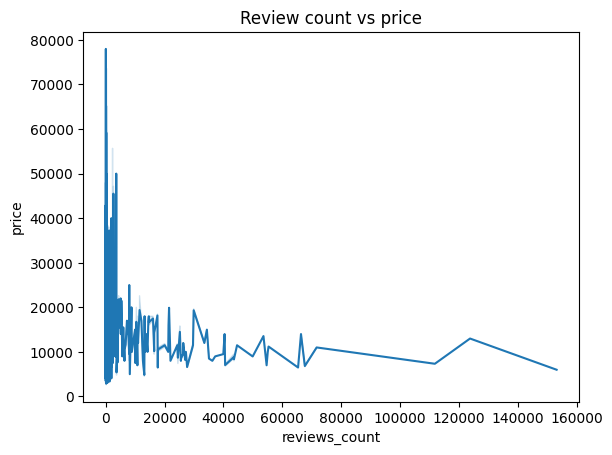

In [52]:
sns.lineplot(x='reviews_count', y='price', data=df_cleaned)
plt.title('Review count vs price')
plt.show()

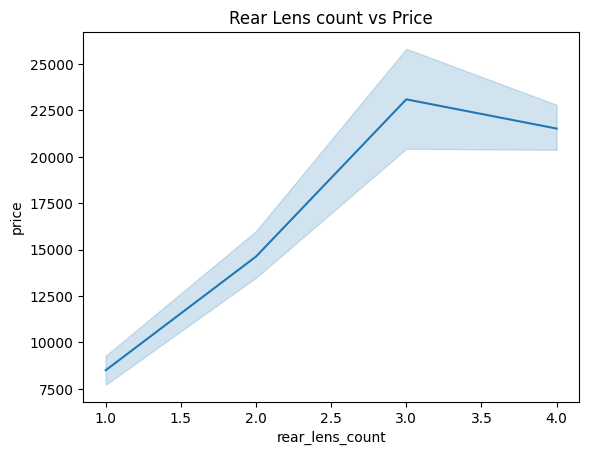

In [47]:
sns.lineplot(x='rear_lens_count', y='price', data=df_cleaned)
plt.title('Rear Lens count vs Price')
plt.show()

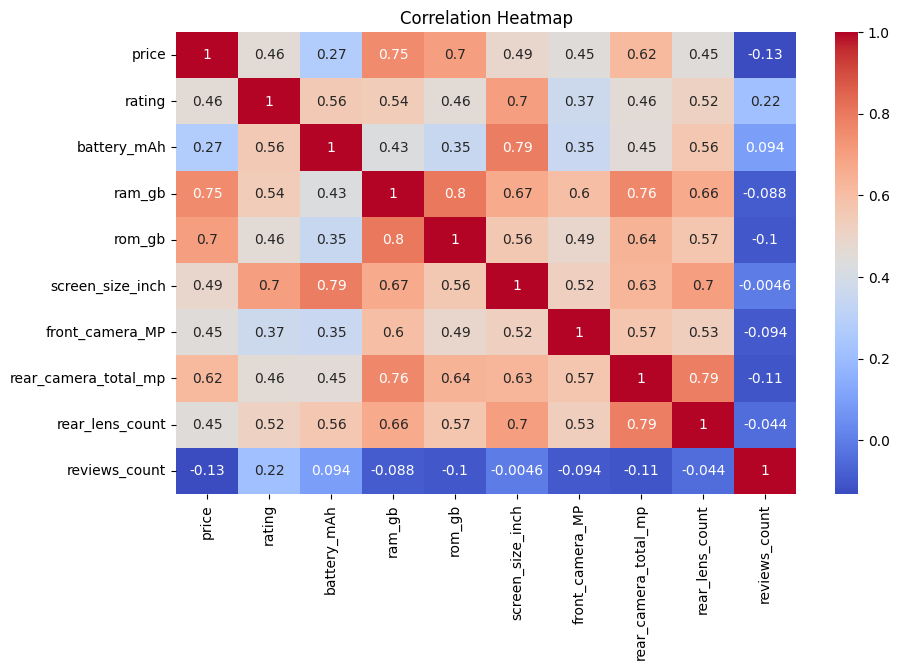

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.drop(columns=['name', 'processor']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

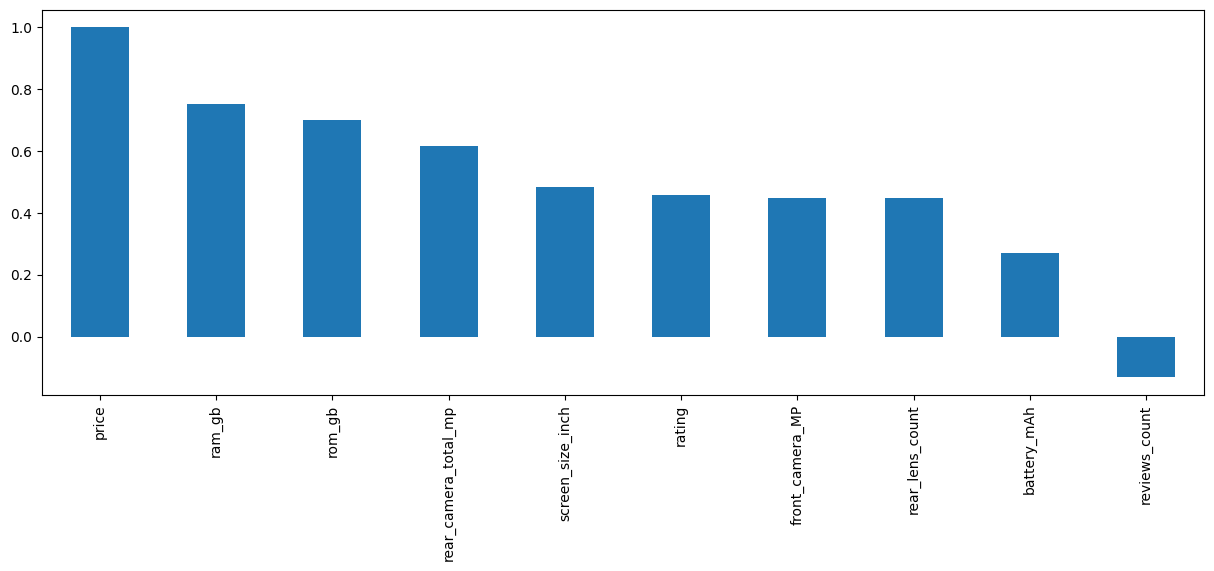

In [49]:
plt.figure(figsize=(15, 5))
df_cleaned.drop(columns=['name', 'processor']).corr()['price'].sort_values(ascending=False).plot(kind='bar')

## 6. Insights Summary
📌 1. Price Distribution
- The majority of mobile phones are priced between 5000 and 20000 PKR.
- Price is right-skewed, with a few high-end phones acting as outliers.

🔋 2. Battery
- Phones typically offer 3000–5000 mAh batteries.
- No strong correlation found between battery and price.

🧠 3. Processor
- Most common processors: Qualcomm Snapdragon 730g, MediaTek Helo G90T etc.
- Snapdragon variants generally associated with higher price.

💾 4. Memory (RAM & ROM)
- Strong positive correlation between RAM size and price.
- Phones with higher ROM also trend toward the higher price range.

📸 5. Camera
- Front and rear camera specs vary widely.
- Phones with more rear lenses (4+) tend to have higher prices.

📐 6. Screen Size
- Most phones have screen sizes between 6.0 and 6.7 inches.
- Slight positive correlation between screen size and price.

🌟 7. Rating & Reviews
- High-priced phones have higher ratings.
- Review counts are clustered — not highly correlated with price.

## 7. Conclusion
In this project, I performed a complete exploratory data analysis (EDA) on a dataset of Android mobile devices. After thorough cleaning and transformation of the data, I explored various trends and patterns between specifications like RAM, ROM, battery, camera, screen size, processor, and price.

📌 Key Takeaways:
- 📈 Price increases with RAM, ROM, and screen size, showing that storage and display are major pricing factors.

- 💡 Phones with Snapdragon processors tend to cost more than others, suggesting brand influence on pricing.

- 📷 Devices with more rear camera lenses generally have higher prices, though front camera megapixels vary widely regardless of price.

- 🔋 Surprisingly, battery capacity has little impact on price, suggesting it may not be a strong differentiator.

- ⭐ Some high-priced phones have low user ratings, indicating pricing doesn’t always guarantee satisfaction.